In [257]:
from iuvs import io, scaling
from astropy.io import fits
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (32/3, 8)

In [255]:
summaryfile = io.l1b_filenames('summary', ext='.txt')[0]

In [262]:
summary = pd.read_table(summaryfile, skiprows=26, skipinitialspace=True, sep=' ',index_col=0)

In [263]:
summary.columns

Index(['filename', 'OBS_ID', 'XUV', 'INT_TIME', 'NX', 'NY', 'NZ', 'X1', 'X2', 'Y1', 'Y2', 'BINX', 'BINY', 'MCP_HV', 'SHUT_STATE', 'PHASE', 'MODE', 'CYCLE', 'DET_TEMP', 'CASE_TEMP', 'FOV_DEG', 'STIM_STATE', 'FILL_BINS', 'TARGET', 'PURPOSE'], dtype='object')

In [267]:
pattern = 'cruisecal2-mode080-muv'
pattern = 'orbit00490'
pattern = 'cruisecal2-mode070'
fname = io.l1b_filenames(pattern, stage=False)
fname

['/Users/maye/data/iuvs/level1b/mvn_iuv_l1b_cruisecal2-mode070-muv_20140521T080545_v01_r01.fits.gz']

In [266]:
fname

['/Users/maye/data/iuvs/level1b/mvn_iuv_l1b_cruisecal2-mode070-muv_20140521T080545_v01_r01.fits.gz']

In [268]:
l1b = io.L1BReader(fname)

In [270]:
l1b.DarkIntegration

,0,1
TIMESTAMP,4.539315e+08,4.539318e+08
ET,4.539316e+08,4.539319e+08
UTC,2014/141 May 21 08:05:31.94743UTC,2014/141 May 21 08:10:27.94270UTC
MIRROR_DN,15235,15235
MIRROR_DEG,6.306152,6.306152
FOV_DEG,12.6123,12.6123
LYA_CENTROID,1,1


In [271]:
dark1, dark2 = l1b.detector_dark

In [272]:
dark1.mean()

40.964488636363633

In [273]:
dark2.mean()

38.852982954545453

In [17]:
fits.info('dark_fitting.fits')

Filename: dark_fitting.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       8   (341, 62)    int32   
1    DARK2       ImageHDU         9   (341, 62)    int32   
2    RANK-1      ImageHDU        16   (341, 62)    float64   
3    RANK0       ImageHDU        16   (341, 62)    float64   
4    RANK1       ImageHDU        16   (341, 62)    float64   
5    RANK2       ImageHDU        16   (341, 62)    float64   
6    RANK3       ImageHDU        16   (341, 62)    float64   
7    RANK4       ImageHDU        16   (341, 62)    float64   


In [229]:
def do_plot(data, title, header=None):
    fig, axes = plt.subplots(nrows=2)
    if header is not None:
        coeffs = eval(header['COEFFS'])
        coeffs = [round(i, 4) for i in coeffs]
        print(coeffs)
    else:
        coeffs = 0.0
    axes[0].plot(data[30])
    axes[0].set_title("{}, profile at spatial bin 30".format(title))
    axes[0].set_ylim(-500, 500)
    imax = axes[1]
    im = imax.imshow(data,vmin=-500, vmax=500, cmap='gray')
    plt.colorbar(im, ax=imax, orientation='horizontal')
    imax.set_title("{}, stddev: {:.1f} DN, {}".format(title, data.std(), coeffs),
                  fontsize=16)
#     fig.tight_layout()
    fig.savefig(title+'.png', dpi=150)

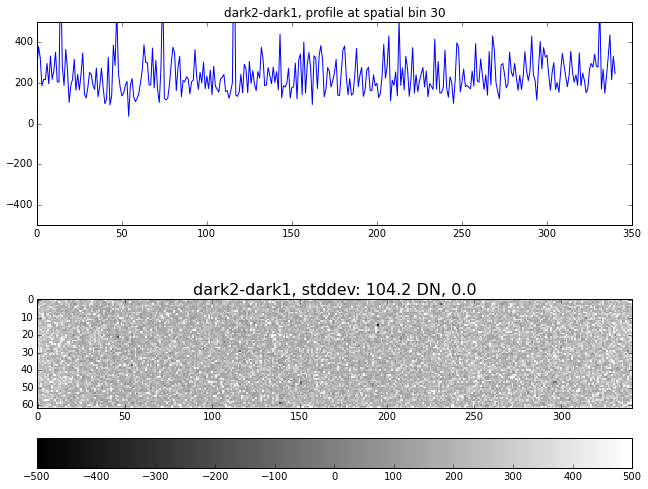

In [230]:
do_plot(dark2-dark1,'dark2-dark1')

[235.8248]


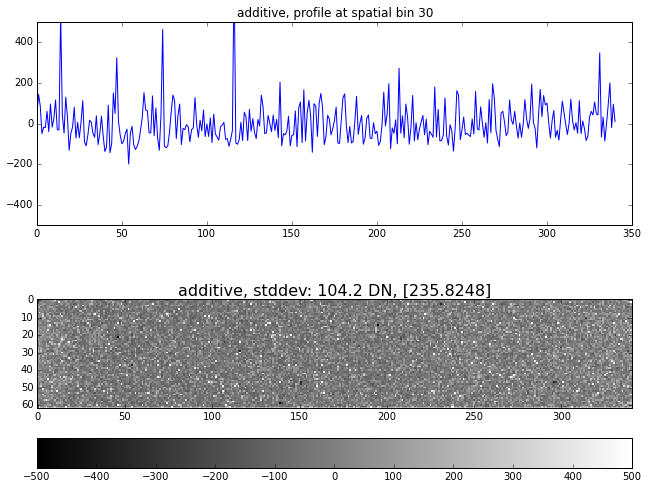

In [231]:
header = fits.getheader('dark_fitting.fits', 'RANK-1')
do_plot(fits.getdata('dark_fitting.fits', 'RANK-1'), 'additive',
       header)

[1.4511]


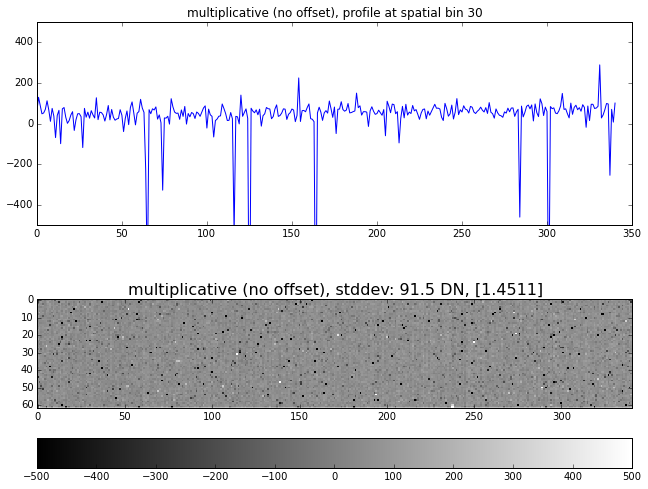

In [232]:
do_plot(fits.getdata('dark_fitting.fits', 'RANK0'), 'multiplicative (no offset)',
        fits.getheader('dark_fitting.fits', "RANK0"))

[1.2536, 129.0344]


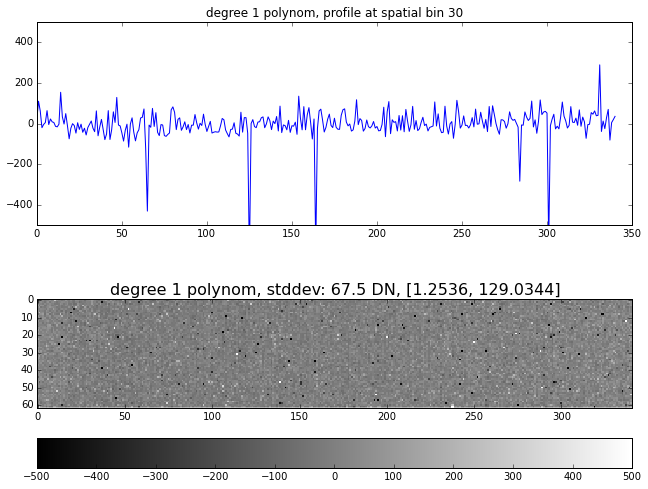

In [233]:
do_plot(fits.getdata('dark_fitting.fits', 'RANK1'), 'degree 1 polynom',
       fits.getheader('dark_fitting.fits', "RANK1"))

[-0.0001, 1.4888, 58.9136]


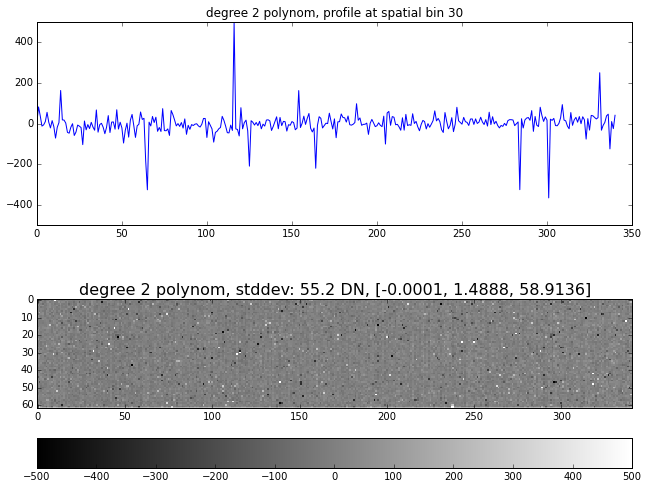

In [234]:
do_plot(fits.getdata('dark_fitting.fits', 'RANK2'), 'degree 2 polynom',
       fits.getheader('dark_fitting.fits', 'rank2'))

[0.0, -0.0002, 1.542, 47.5132]


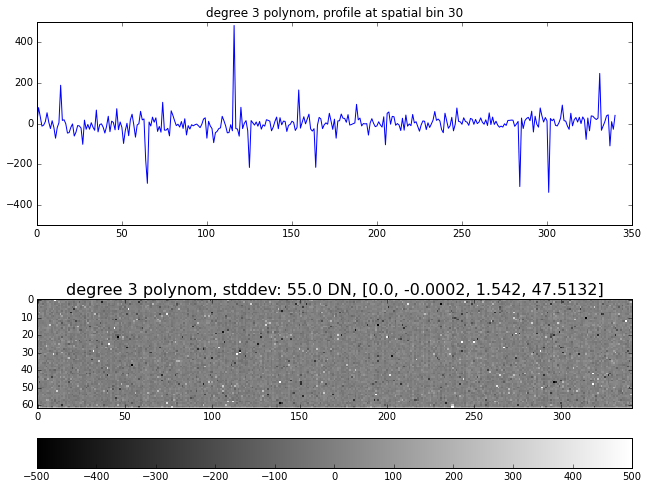

In [237]:
do_plot(fits.getdata('dark_fitting.fits', 'RANK3'), 'degree 3 polynom',
       fits.getheader('dark_fitting.fits', 'rank3'))

In [242]:
ranks = [-1,0,1,2,3]
for rank in ranks:
    header = fits.getheader('dark_fitting.fits', 'rank'+str(rank))
    print(header['COEFFS'])

[235.82480370850152]
[1.4510501785354721]
[1.2535862923342835, 129.03443681032883]
[-0.00010518865504002474, 1.4888327725011952, 58.913645957805009]
[1.203598772902105e-08, -0.00015978889457175823, 1.5420174307729337, 47.513171648014264]
